### Import

In [2]:
import os
import numpy as np
import sys
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.signal import find_peaks
from scipy.signal import resample
from scipy.signal import resample_poly
from tqdm import tqdm
from sklearn.decomposition import PCA
from scipy.stats import zscore

### Fonts

In [3]:
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Helvetica'}

### Read Pickle data

In [4]:
X = pickle.load( open("../../data/ecg/preprocessed.p", "rb"))
ptbdb_abnormal_resampled = X['ptbdb_abnormal_resampled'].T
ptbdb_normal_resampled = X['ptbdb_normal_resampled'].T
mitbih_train_resampled = X['mitbih_train_resampled'].T
mitbih_test_resampled = X['mitbih_test_resampled'].T

### Compute Mean

In [23]:
meansignal = np.mean(mitbih_train_resampled,axis=1)

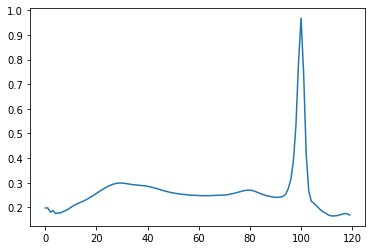

In [24]:
plt.plot(meansignal)

### Create 4 basis functions covering, each fitting the amplitude of a section of the rhythm

(120,)
(120,)


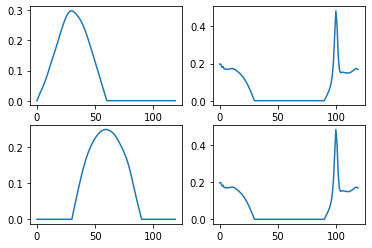

In [38]:
x = np.linspace(0,2*np.pi,121)[:-1]
s = np.sin(x)
s[s < 0] = 0
s0 = np.roll(s,-30,axis=0)
s1 = np.roll(s,30,axis=0)
s2 = np.roll(s,90,axis=0)
s3 = np.roll(s,120,axis=0)
print(s0.shape)
print(meansignal.shape)
plt.plot(meansignal)
s0 = s0 * meansignal
s1 = s1 * meansignal
s2 = s2 * meansignal
s3 = s3 * meansignal
plt.subplot(2,2,1)
plt.plot(s3)
plt.subplot(2,2,2)
plt.plot(s2)
plt.subplot(2,2,3)
plt.plot(s1)
plt.subplot(2,2,4)
plt.plot(s0)
# s2 = s1 * meansignal
# s3 = s2 * meansignal
# s4 = s3 * meansignal
# BF = np.vstack((s0,s1,s2,s3)).T

### Plot the basis functions

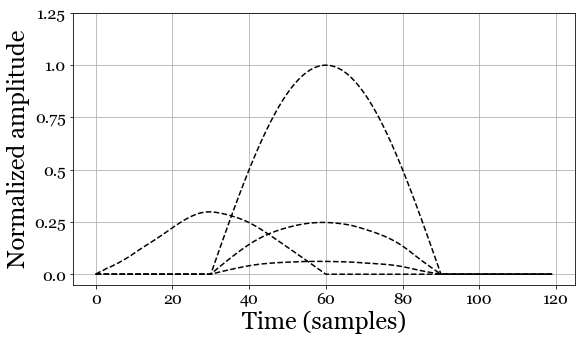

In [27]:
plt.figure(figsize=(9,5));
plt.plot(BF,'k--');
plt.grid();
plt.xticks(np.linspace(0,120,7),labels=np.linspace(0,120,7).astype(int),**csfont,fontsize=16)
plt.yticks(np.linspace(0,1.25,6),labels=np.round(np.linspace(0,1.25,6),2),**csfont,fontsize=16)
plt.xlabel('Time (samples)',fontsize=24,**csfont);
plt.ylabel('Normalized amplitude',fontsize=24,**csfont);
plt.savefig('../../assets/matplotlib/018_ecg_basisfunctions.png',dpi=300,bbox_inches="tight")

### Compute the mean component

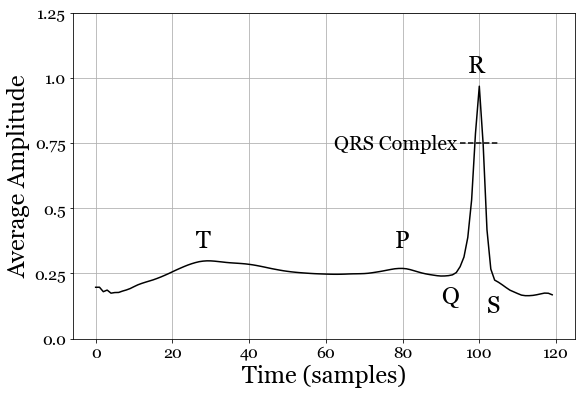

In [7]:
plt.figure(figsize=(9,6));
plt.plot(meansignal,'k');
plt.plot([95,105],[0.75,0.75],'k--')
plt.grid();
plt.xticks(np.linspace(0,120,7),labels=np.linspace(0,120,7).astype(int),**csfont,fontsize=16)
plt.yticks(np.linspace(0,1.25,6),labels=np.round(np.linspace(0,1.25,6),2),**csfont,fontsize=16)
plt.xlabel('Time (samples)',fontsize=24,**csfont);
plt.ylabel('Average Amplitude',fontsize=24,**csfont);
plt.text(26,0.35,'T',**csfont,fontsize=24);
plt.text(78,0.35,'P',**csfont,fontsize=24);
plt.text(97,1.02,'R',**csfont,fontsize=24);
plt.text(90,0.14,'Q',**csfont,fontsize=24);
plt.text(102,0.10,'S',**csfont,fontsize=24);
plt.text(62,0.725,'QRS Complex',**csfont,fontsize=20);
plt.savefig('../../assets/matplotlib/018_ecg_mean.png',dpi=300,bbox_inches="tight")

### Add Bias Term to Basis functions

In [8]:
BF = np.hstack((BF,BF[:,:2]))
BF = BF[:,:-1]
BF[:,-1] = 1

### Visualize

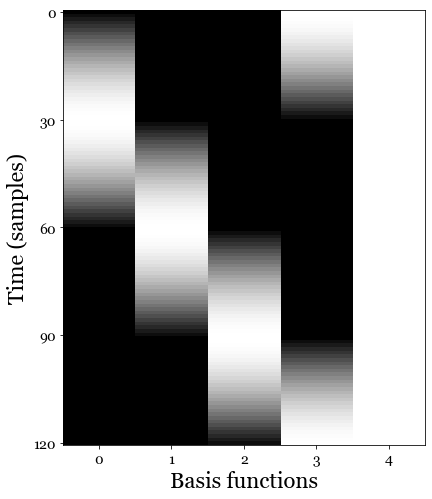

In [9]:
plt.figure(figsize=(8,8))
plt.imshow(BF,aspect=0.05,interpolation='nearest',cmap='gray')
plt.xlabel('Basis functions',fontsize=22,**csfont);
plt.ylabel('Time (samples)',fontsize=22,**csfont,rotation=90);
plt.yticks(np.linspace(0,119,5),labels=np.round(np.linspace(0,120,5)).astype(int),fontsize=14,**csfont);
plt.xticks(np.linspace(0,4,5),labels=np.round(np.linspace(0,4,5)).astype(int),fontsize=14,**csfont);
plt.savefig('../../assets/matplotlib/018_ecg_basis_functions_2d.png',dpi=300,bbox_inches="tight")

### Fit

In [15]:
Y = mitbih_train_resampled
W = np.dot(np.dot(np.linalg.inv(np.dot(BF.T,BF)),BF.T),Y)

### Reconstruct

In [17]:
Yrecon = np.dot(BF,W)

### Compare

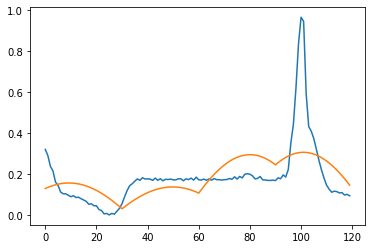

In [22]:
plt.plot(Y[:,1000])
plt.plot(Yrecon[:,1000])